## Circle 13 Chicago Dataset Exploratory Data Analysis
#### This is a circle 13 project for exploratory data analysis for the chicago dataset
#### Members
* Otim William Gerison
* Roddiyyat Nasirudeen Taiwo
* Okafor Osita Brian

### 1. Data Preparation 

In [1]:
#Importing the necessary libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
file_path = r"C:\Users\Rodiyat\Downloads\crime_data_chicago.csv"
df = pd.read_csv(file_path)


In [3]:
#Previewing the Dataset
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [4]:
df.shape

(2278726, 23)

In [5]:
#Making a copy of the dataset
df_copy = df.copy()

In [6]:
#Checking the data types of our columns
df_copy.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Checking for missing values

In [7]:
def missing_values(df_copy):
    row, column = df_copy.shape
    return df_copy.isna().sum()

In [8]:
missing_values(df_copy)

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

Since Ward, Community area, Location, Location Description and District are categorical in nature, we use the mode to fill in the missing values while the X coordinate, Y coordinate, Latitude and Longitude we use the median since they are non categorical

In [9]:
#Deriving their modes
ward = df_copy["Ward"].mode()[0]
community_area = df_copy["Community Area"].mode()[0]
location= df_copy["Location"].mode()[0]
loc_description = df_copy["Location Description"].mode()[0]
district = df_copy["District"].mode()[0]

In [10]:
#Filling in the missing values with the mode
df_copy["Ward"] = df_copy["Ward"].fillna(ward)
df_copy["Community Area"] = df_copy["Community Area"].fillna(community_area)
df_copy["Location"] = df_copy["Location"].fillna(location)
df_copy["District"] = df_copy["District"].fillna(district)
df_copy["Location Description"] = df_copy["Location Description"].fillna(loc_description)

In [11]:
#Deriving and filling in missing values using the median
df_copy['Longitude'] = df_copy.groupby('District')['Longitude'].transform(lambda x: x.fillna(x.median()))
df_copy['Latitude'] = df_copy.groupby('District')['Latitude'].transform(lambda x: x.fillna(x.median()))
df_copy['X Coordinate'] = df_copy.groupby('District')['X Coordinate'].transform(lambda x: x.fillna(x.median()))
df_copy['Y Coordinate'] = df_copy.groupby('District')['Y Coordinate'].transform(lambda x: x.fillna(x.median()))

There is a missing value in the Case Number column but we can not use median or mode or mean to fill it and since it is only 1, we drop it.

In [12]:
df_copy.dropna(inplace = True)

In [13]:
df_copy.isna().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

Checking for duplicates

In [14]:
print((df_copy.duplicated()).sum())

0


In [15]:
#Dropping unnecessary columns
def drop_column(df_copy):
    df_copy.drop(columns = ["Unnamed: 0", "ID"], inplace=True)

In [16]:
drop_column(df_copy)

In [17]:
df_copy.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [18]:
df_copy.to_csv("dfchicago_clean.csv")

### 2. Statistical Exploration 

In [144]:
df_copy.describe()

,Date,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year
count,2254741,2.254741e+06,2.254741e+06,2.254741e+06,2.254741e+06,2.254741e+06,2.254741e+06,2.254741e+06
mean,2010-02-18 11:09:03.858346752,1.186136e+03,1.128823e+01,2.314287e+01,3.652911e+01,1.164569e+06,1.885747e+06,2.009633e+03
min,2001-01-01 00:00:00,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03
25%,2004-12-17 15:20:00,6.210000e+02,6.000000e+00,1.100000e+01,2.400000e+01,1.152948e+06,1.859053e+06,2.004000e+03
50%,2009-04-24 06:30:00,1.034000e+03,1.000000e+01,2.400000e+01,2.900000e+01,1.166060e+06,1.890673e+06,2.009000e+03
75%,2014-11-17 11:00:00,1.731000e+03,1.700000e+01,3.200000e+01,5.300000e+01,1.176365e+06,1.909219e+06,2.014000e+03
max,2022-07-27 23:35:00,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.022000e+03
std,NaN,7.026159e+02,6.945762e+00,1.333986e+01,2.092605e+01,1.673955e+04,3.209855e+04,6.010493e+00


From the above description, this is an accumulated dataset of 21 years (2001 - 2022).

In [145]:
df_copy['Year'].unique()

array([2008, 2018, 2007, 2021, 2001, 2006, 2014, 2010, 2016, 2011, 2004,
       2012, 2015, 2003, 2002, 2017, 2013, 2020, 2022, 2019, 2005, 2009],
      dtype=int64)

In [146]:
df_copy.loc[:,['Primary Type', 'Location Description', 'Year', 'Season']].head()

,Primary Type,Location Description,Year,Season
0,CRIMINAL DAMAGE,STREET,2008,Summer
1,WEAPONS VIOLATION,POOL ROOM,2018,Summer
2,BURGLARY,RESIDENCE,2007,Spring
3,ASSAULT,NURSING HOME/RETIREMENT HOME,2018,Summer
4,ASSAULT,PARKING LOT / GARAGE (NON RESIDENTIAL),2021,Summer


In [147]:
#mode
df_copy.mode()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Location,Month,Day,Season
0,HJ104730,2007-01-01 00:01:00,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,False,False,421.0,...,25.0,06,1100658.0,1934241.0,2001.0,02/10/2018 03:50:01 PM,"(41.976290414, -87.905227221)",July,Friday,Summer
1,HK172551,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#median
df_copy.median(numeric_only=True)

In [ ]:
#mean
df_copy.mean()

In [ ]:
monthly_crime_count = df_copy.groupby('Month')['Primary Type'].value_counts().unstack().fillna(0)

In [ ]:
monthly_crime_count.mean()

From the above analysis, the monthly most crime is THEFT and the least crime is NON-CRIMINAL(SUBJECT SPECIFIED).

In [ ]:
daily_crime_count = df_copy.groupby('Day')['Primary Type'].value_counts

In [ ]:
daily_crime_count().head()

From the above analysis, The crime with the Highest daily occurrence is THEFT and the day of the week with the highest number of crimes is Friday.

In [73]:
daily_crime_count().tail(1)

Day        Primary Type  
Wednesday  NON - CRIMINAL    1
Name: count, dtype: int64

From the above analysis, The crime with the least daily occurrence is NON-CRIMINAL and the day of the week with the least number of crimes is Wednesday.

In [66]:
seasonal_crime_count = df_copy.groupby('Season')['Primary Type'].value_counts

In [69]:
seasonal_crime_count().head()

Season  Primary Type   
Autumn  THEFT              120963
        BATTERY             99927
        CRIMINAL DAMAGE     65390
        NARCOTICS           53364
        ASSAULT             35703
Name: count, dtype: int64

From the above analysis, The crime with the Highest seasonal occurrence is THEFT and the season with the highest number of crimes is Autumn.

In [74]:
seasonal_crime_count().tail()

Season  Primary Type                    
Winter  NON-CRIMINAL                        6
        OTHER NARCOTIC VIOLATION            4
        NON - CRIMINAL                      3
        RITUALISM                           3
        NON-CRIMINAL (SUBJECT SPECIFIED)    2
Name: count, dtype: int64

From the above analysis, The crime with the least saesonal occurrence is NON-CRIMINAL and the season with the least number of crimes is Winter.

In [75]:
highest_crime_type = df_copy['Primary Type'].value_counts().head(1)

In [78]:
highest_crime_type

Primary Type
THEFT    473443
Name: count, dtype: int64

THEFT is the crime type with highest occurrence.

In [80]:
lowest_crime_type = df_copy['Primary Type'].value_counts().tail(1)

In [81]:
lowest_crime_type

Primary Type
NON-CRIMINAL (SUBJECT SPECIFIED)    2
Name: count, dtype: int64

NON-CRIMINAL the crime type with lowest occurrence

### 3. Visual Exploration 

The Chicago Crime dataset is a valuable resource for understanding criminal incidents in the city. Here are some effective visualization techniques to explore and analyze this dataset:



1. Scatter-plots

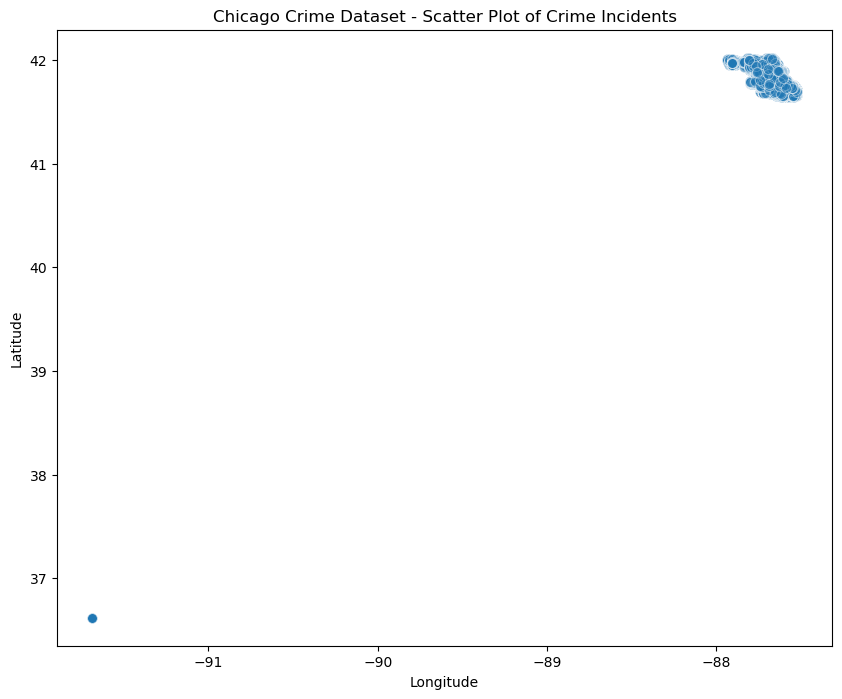

In [19]:
# Using a scatter plot to show the crime incidents across different areas of Chicago. Each point represents a crime location.

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df_copy, alpha=0.5, s=50)  
plt.title("Chicago Crime Dataset - Scatter Plot of Crime Incidents")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

2. Heatmaps

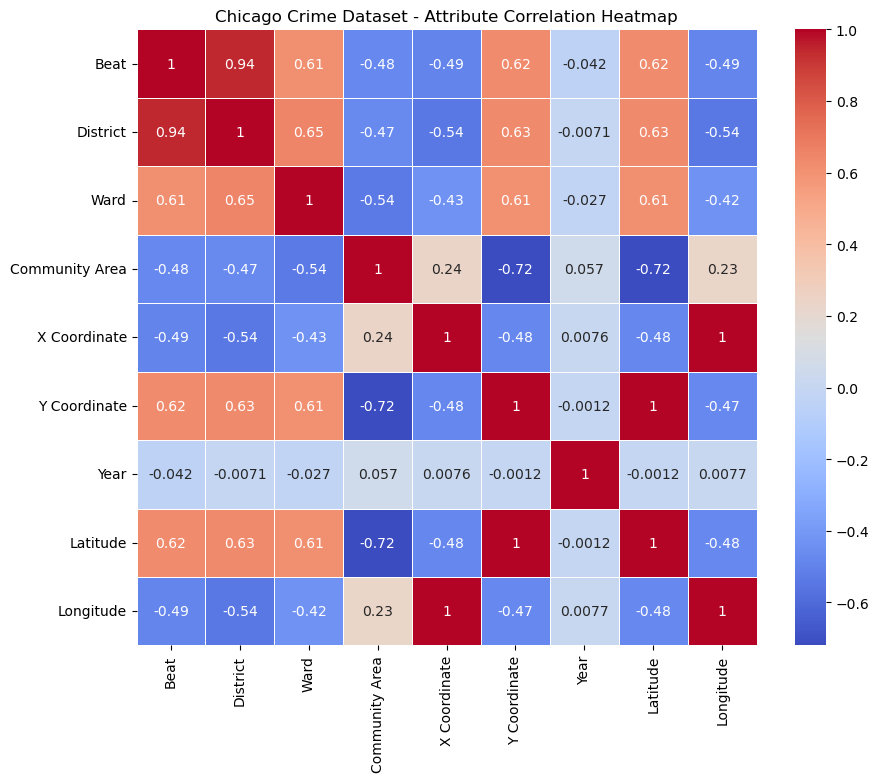

In [20]:
# Using the seaborn libary, lets create heatmaps with our dataset, our heatmap visualizes the density of crime across different areas of Chicago.

numeric_columns = df_copy.select_dtypes(include=['number']).columns
correlation_matrix = df_copy[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Chicago Crime Dataset - Attribute Correlation Heatmap")
plt.show()


3. Bar Chat

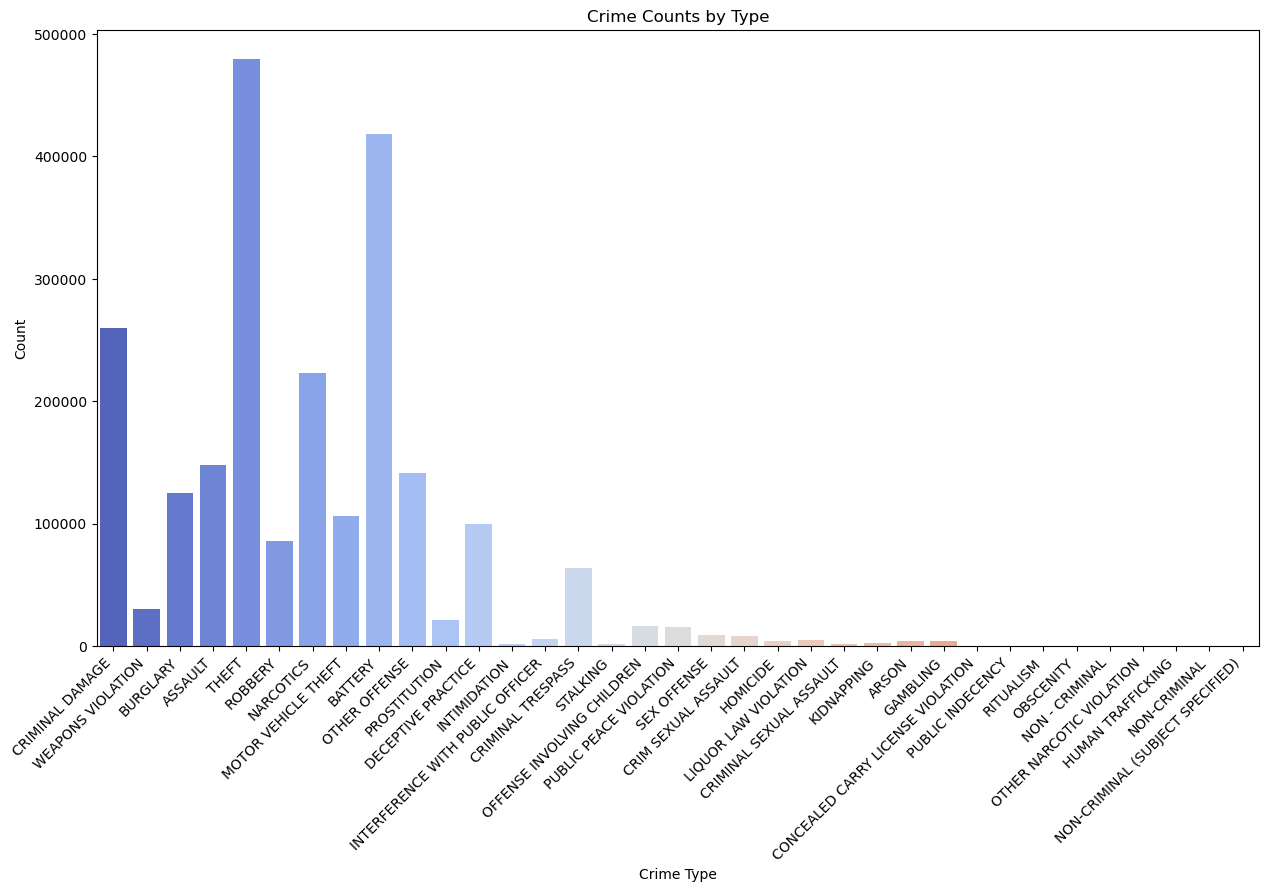

In [21]:
# Bar chart to show the total number of crimes for each specific type (e.g., theft, assault, burglary).


plt.figure(figsize=(15, 8))
sns.countplot(x='Primary Type', data=df_copy, palette='coolwarm')
plt.title("Crime Counts by Type")
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  
plt.show()

4. Pair Plot

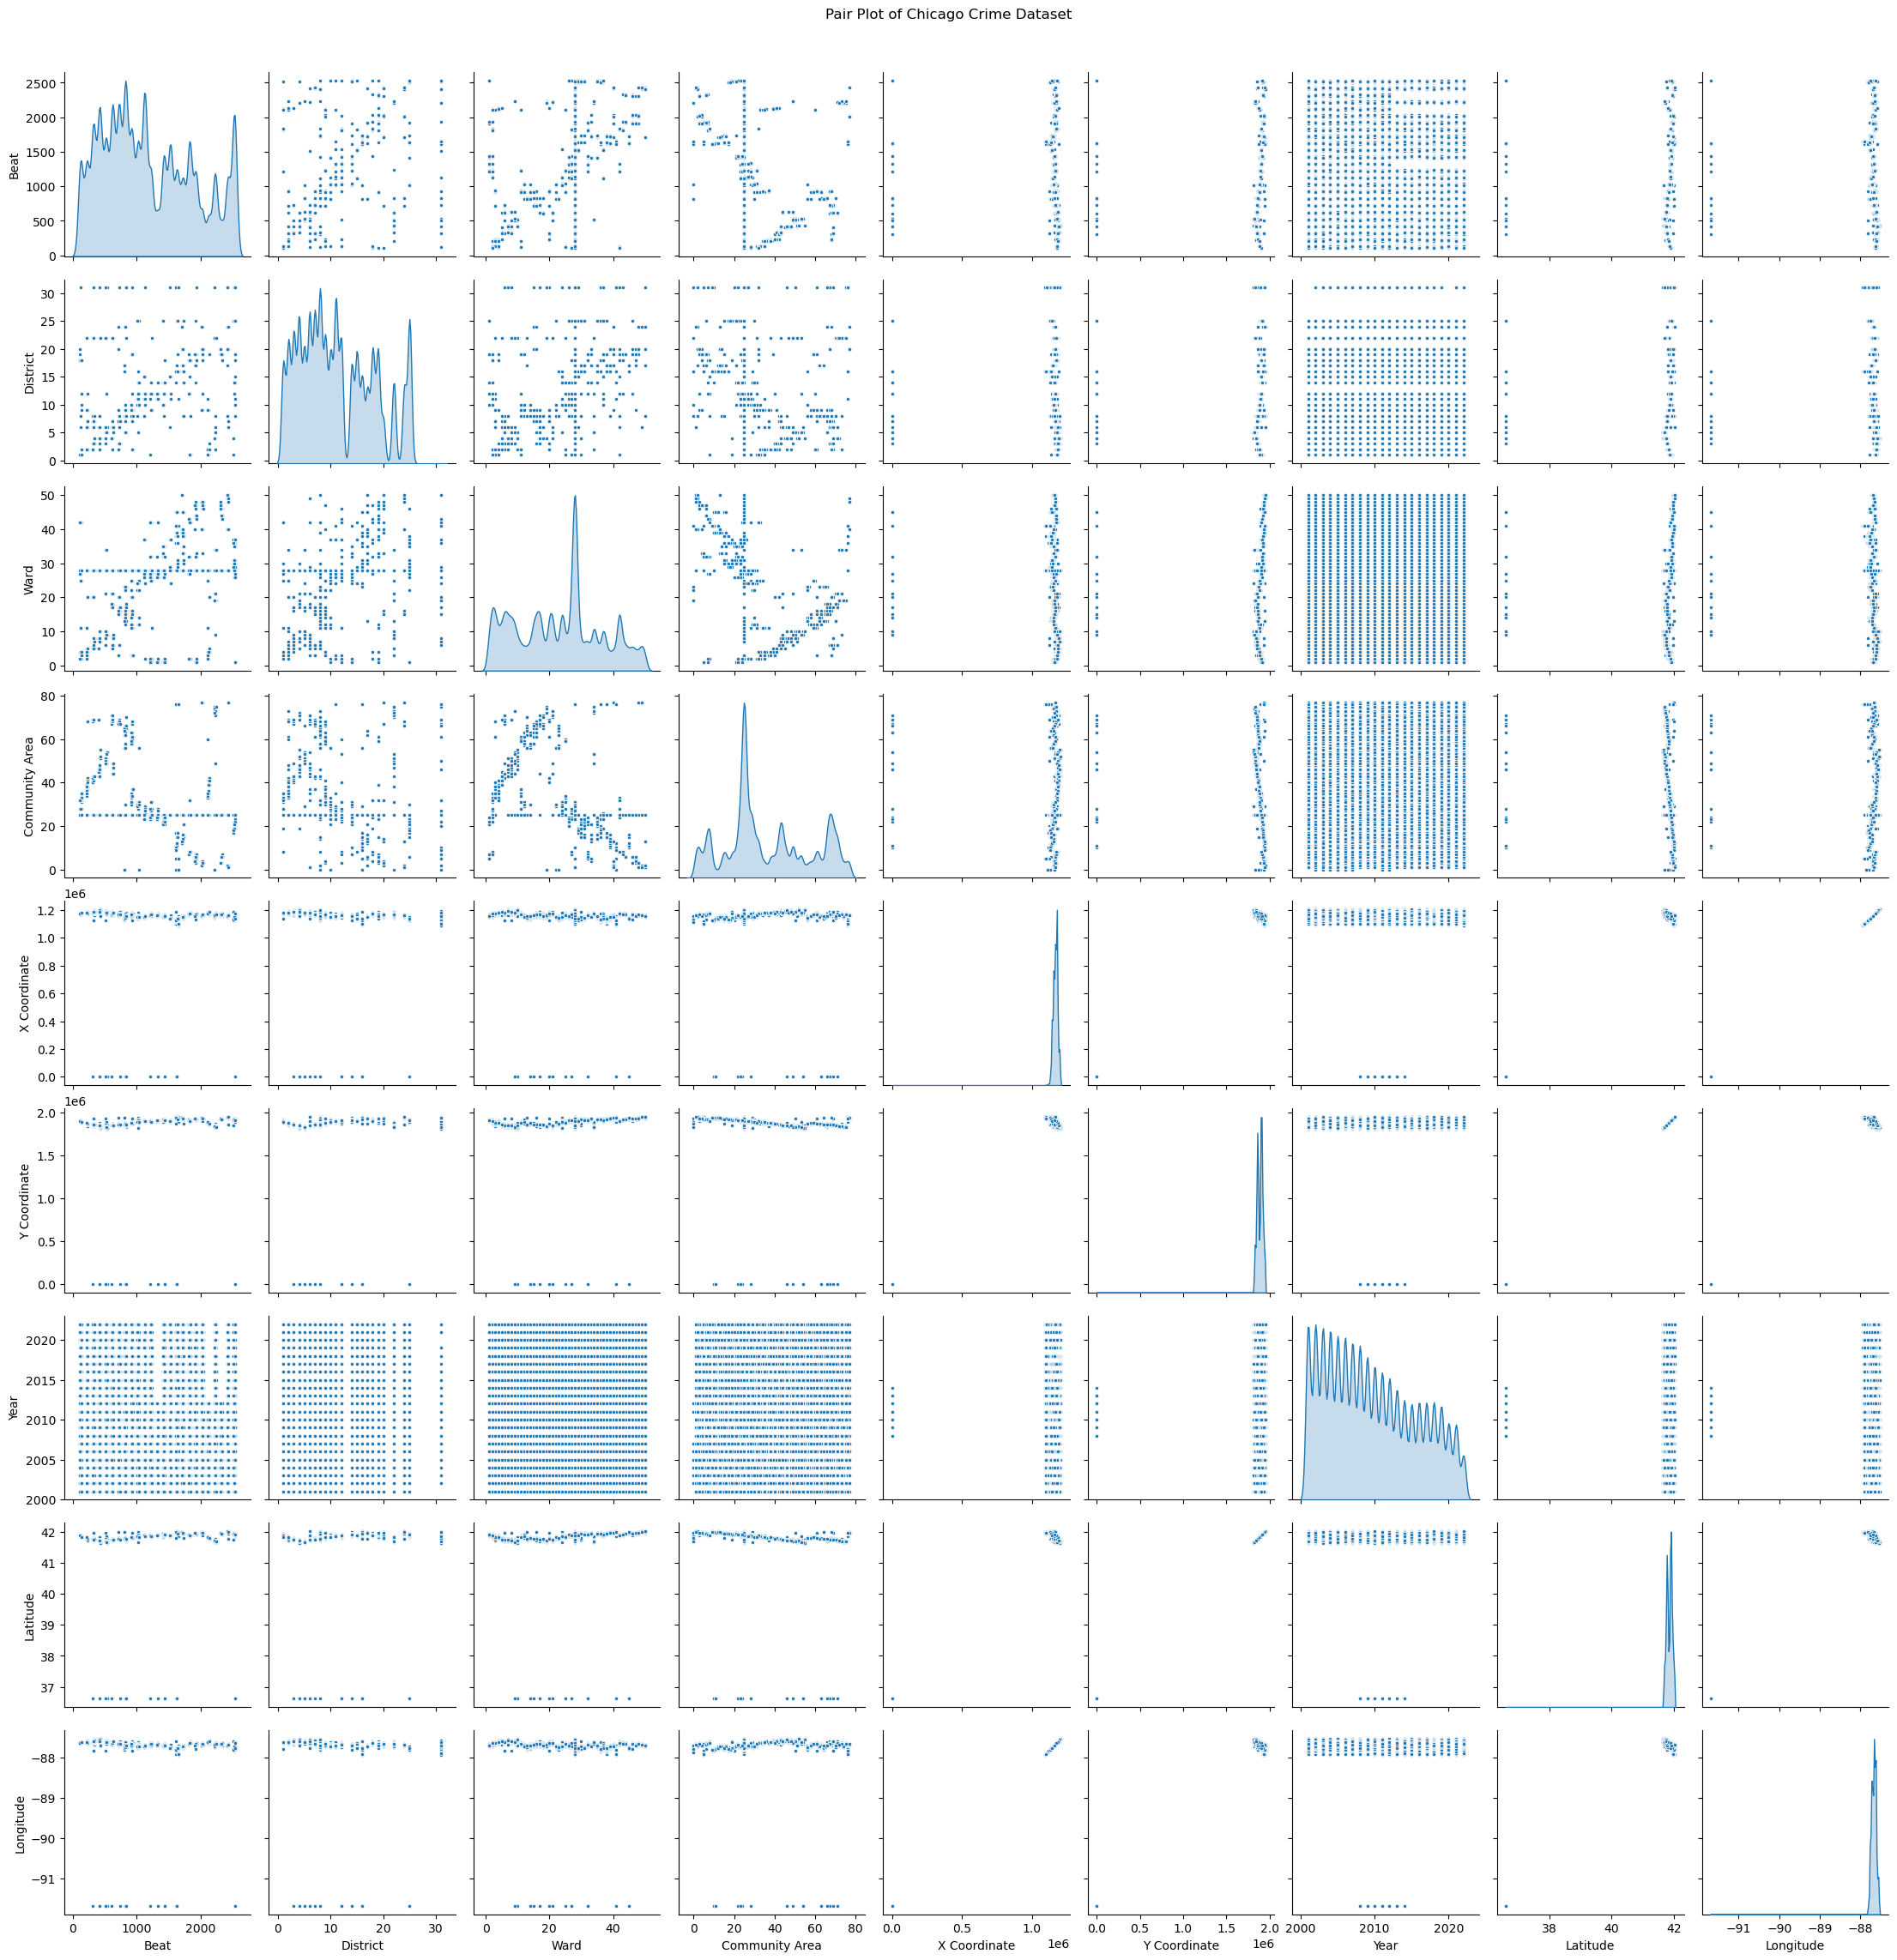

In [22]:
#In this pair plot:

#The scatter plots show the relationships between different numeric attributes.
#The histograms on the diagonal represent the distribution of each attribute.

numeric_columns = df_copy.select_dtypes(include=['number']).columns
sns.pairplot(df_copy[numeric_columns], diag_kind='kde', markers='.')
plt.suptitle("Pair Plot of Chicago Crime Dataset", y=1.02)
plt.show()

5. Joint Plot

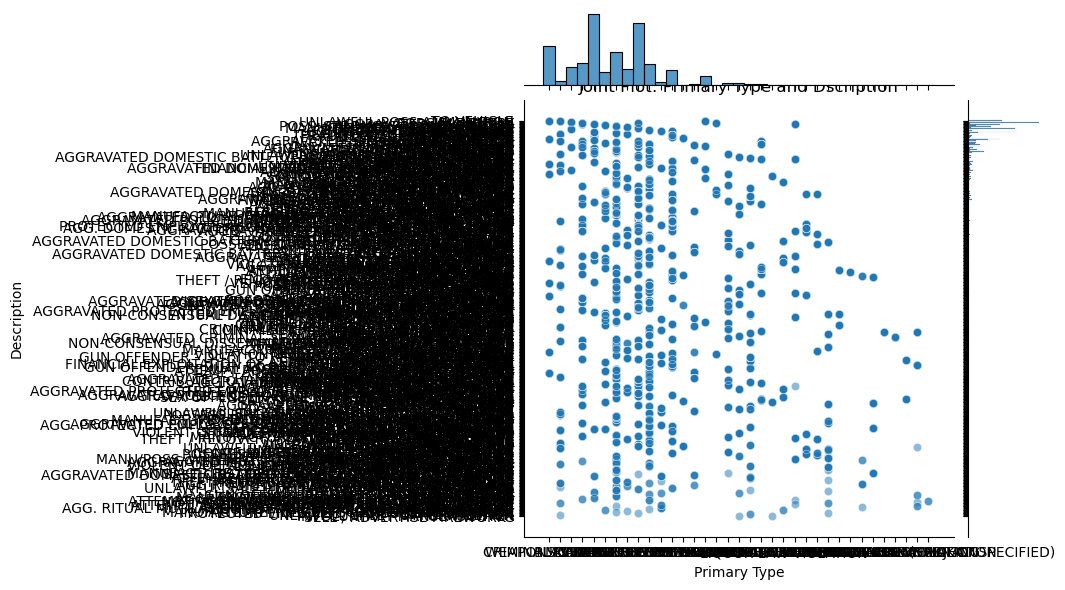

In [23]:
#In this joint plot:

#The scatter plot in the center shows the relationship between primary type and description.
#The histograms on the axes represent the distribution of each variable.

sns.jointplot(x='Primary Type', y='Description', data=df_copy, kind='scatter', alpha=0.5)
plt.title("Joint Plot: Primary Type and Dscription")
plt.show()

6. Bubble Plot

In [ ]:
#In this bubble plot:

#The x-axis represents crime description.
#The y-axis represents community area where crime was committed.
#The size of each bubble represents the crime count (larger bubbles indicate more crimes).

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Description', y='Community Area', size='Case Number', data=df_copy, alpha=0.7)
plt.title("Bubble Plot: Crime Count vs. Community Area and Description")
plt.xlabel("Description")
plt.ylabel("Community Area")
plt.show()

### Conclusion

The aim of this assignment was for the tudents to practice the three fundamental aspects of 'The Data Science Process'
- Data Collection;
- Data Cleaning;
- Exploratory data analysis


Each of these phases is integral to the data science process and should be done accordingly by a data science professional.
